<a href="https://colab.research.google.com/github/rnanggraini10/Sentiment-Analysis-of-Public-Opinion-on-RT-Internet-Usage-in-Blitar-City/blob/main/Sentiment_Analysis_of_Public_Opinion_on_RT_Internet_Usage_in_Blitar_City_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Saran-Internet-RT-Kota-Blitar.csv')

In [ ]:
data.head(10)

,Nama,Kecamatan,Kelurahan,Jenis Kelamin,Comment
0,rijal,Kepanjenkidul,Sentul,Laki-laki,lebih cepet lagi dong
1,RIZA KURNIAWAN,Kepanjenkidul,Tanggung,Laki-laki,SEMOGA KEDEPAN TERUS DI TINGKATKAN DAN SEMAKIN...
2,Helmy kurniawan,Kepanjenkidul,Tanggung,Laki-laki,Bandwith bisa ditingkatkan supaya tidak lemot ...
3,Mukhofifatul Ainiya,Kepanjenkidul,Tanggung,Perempuan,Untuk pemasangan kabel mungkin bisa lebih dira...
4,Anis kholidah,Kepanjenkidul,Sentul,Perempuan,Kalau bisa di tempatkan di masjid atau mushola...
5,Didik gunawan,Kepanjenkidul,Sentul,Laki-laki,Semoga internet RT ini tetap berkelanjutan
6,Emy widayati,Kepanjenkidul,Sentul,Perempuan,Semoga program internet RT ttp berjalan karena...
7,Sulisanto,Kepanjenkidul,Sentul,Laki-laki,Pengadaan internet ditingkat kan d fasilitas umum
8,Muhammad Ghusnul Ma'Arif,Kepanjenkidul,Kepanjenlor,Laki-laki,Krn pentingnya akses internet ini untuk Pengad...
9,Syamsul Huda,Kepanjenkidul,Kepanjenlor,Laki-laki,Untuk pengadaan internet mohon di tambah lagi


##Data Cleansing and Case Holding

Tokenizing

Filtering

Steaming

In [ ]:
df_preprocessed = data.copy()
df_preprocessed = df_preprocessed.drop(columns=['Nama','Kecamatan','Kelurahan','Jenis Kelamin'])
df_preprocessed.head()

,Comment
0,lebih cepet lagi dong
1,SEMOGA KEDEPAN TERUS DI TINGKATKAN DAN SEMAKIN...
2,Bandwith bisa ditingkatkan supaya tidak lemot ...
3,Untuk pemasangan kabel mungkin bisa lebih dira...
4,Kalau bisa di tempatkan di masjid atau mushola...


In [ ]:
import string, re

def cleansing(data):
  #lower test
  data = data.lower()

  #hapus punctuation
  remove = string.punctuation
  translator = str.maketrans(remove," "*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii', 'ignore').decode ('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove stopwords
  data = data.replace('\n',' ')

  return data

In [ ]:
#Jalankan cleansing data
data = []
for index, row in df_preprocessed.iterrows():
  data.append(cleansing(row["Comment"]))

df_preprocessed["Comment"] = data
df_preprocessed.head()

,Comment
0,lebih cepet lagi dong
1,semoga kedepan terus di tingkatkan dan semakin...
2,bandwith bisa ditingkatkan supaya tidak lemot ...
3,untuk pemasangan kabel mungkin bisa lebih dira...
4,kalau bisa di tempatkan di masjid atau mushola...


In [ ]:
!pip install Sastrawi

In [ ]:
#import library
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

Factory = StopWordRemoverFactory()
stopword = Factory.create_stop_word_remover()

data = []
for index, row in df_preprocessed.iterrows():
  data.append(stopword.remove(row["Comment"]))

df_preprocessed["Comment"] = data
df_preprocessed.head()



,Comment
0,lebih cepet dong
1,semoga kedepan terus tingkatkan semakin terses...
2,bandwith ditingkatkan tidak lemot diakses bany...
3,pemasangan kabel mungkin lebih dirapikan
4,kalau tempatkan di masjid mushola tempat umum


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [ ]:
data = []
for index, row in df_preprocessed.iterrows():
  data.append(stemmer.stem(row["Comment"]))

df_preprocessed["Comment"] = data
df_preprocessed.head()

,Comment
0,lebih cepet dong
1,moga depan terus tingkat makin sebar luas dapa...
2,bandwith tingkat tidak lot akses banyak orang
3,pasang kabel mungkin lebih rapi
4,kalau tempat di masjid mushola tempat umum


In [ ]:
import nltk
nltk.download('punkt')

import string, re
import nltk

#tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def word_tokenize_wrapper(text):
  return word_tokenize(text)

df_preprocessed["Comment"] = df_preprocessed["Comment"].apply(word_tokenize_wrapper)
df_preprocessed.head(15)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Comment
0,"[lebih, cepet, dong]"
1,"[moga, depan, terus, tingkat, makin, sebar, lu..."
2,"[bandwith, tingkat, tidak, lot, akses, banyak,..."
3,"[pasang, kabel, mungkin, lebih, rapi]"
4,"[kalau, tempat, di, masjid, mushola, tempat, u..."
5,"[moga, internet, rt, tetap, lanjut]"
6,"[moga, program, internet, rt, ttp, jalan, sang..."
7,"[ada, internet, tingkat, kan, d, fasilitas, umum]"
8,"[krn, penting, akses, internet, untuk, ada, in..."
9,"[ada, internet, mohon, tambah]"


In [ ]:
df_preprocessed.to_csv('saran_bersih.csv', encoding='utf8', index=False)

##Translate

In [ ]:
#install googletrans
!pip3 install googletrans==3.1.0a0

In [ ]:
#Importing library yang dibutuhkan
import pandas as pd
import googletrans
from googletrans import Translator

In [ ]:
#membaca dan menyimpan file csv sebagai dataframe
df = pd.read_csv('saran_bersih.csv')
df.head()

,Comment
0,"['lebih', 'cepet', 'dong']"
1,"['moga', 'depan', 'terus', 'tingkat', 'makin',..."
2,"['bandwith', 'tingkat', 'tidak', 'lot', 'akses..."
3,"['pasang', 'kabel', 'mungkin', 'lebih', 'rapi']"
4,"['kalau', 'tempat', 'di', 'masjid', 'mushola',..."


In [ ]:
#Translate

translator = Translator()
translations = {}
unique_elements = df['Comment'].astype(str).unique() # Convert lists to strings for uniqueness check
for element in unique_elements:
    translations[element] = translator.translate(element).text
translations

{"['lebih', 'cepet', 'dong']": "['more', 'quick', 'dong']",
 "['moga', 'depan', 'terus', 'tingkat', 'makin', 'sebar', 'luas', 'dapat', 'nikmat', 'tiap', 'rumah']": "['moga', 'front', 'continue', 'level', 'makin', 'spread', 'wide', 'get', 'enjoyment', 'each', 'home']",
 "['bandwith', 'tingkat', 'tidak', 'lot', 'akses', 'banyak', 'orang']": "['bandwidth', 'rate', 'no', 'lot', 'access', 'many', 'people']",
 "['pasang', 'kabel', 'mungkin', 'lebih', 'rapi']": "['plug', 'cable', 'maybe', 'more', 'neat']",
 "['kalau', 'tempat', 'di', 'masjid', 'mushola', 'tempat', 'umum']": "['if', 'place', 'at', 'mosque', 'prayer room', 'place', 'public']",
 "['moga', 'internet', 'rt', 'tetap', 'lanjut']": "['hopefully', 'internet', 'rt', 'stay', 'continue']",
 "['moga', 'program', 'internet', 'rt', 'ttp', 'jalan', 'sangat', 'bantu', 'ajar', 'anak', 'itu', 'sangat', 'bantu', 'anggar', 'belanja', 'rumah', 'jadi', 'lebih', 'hemat', 'trimksih']": "['hope', 'program', 'internet', 'rt', 'ttp', 'way', 'very', 'hel

In [ ]:
df.replace(translations, inplace=True)
df.head()

,Comment
0,"['more', 'quick', 'dong']"
1,"['moga', 'front', 'continue', 'level', 'makin'..."
2,"['bandwidth', 'rate', 'no', 'lot', 'access', '..."
3,"['plug', 'cable', 'maybe', 'more', 'neat']"
4,"['if', 'place', 'at', 'mosque', 'prayer room',..."


In [ ]:
df.to_csv('translate_saran.csv', encoding='utf8',index=False)

In [ ]:
import pandas as pd
def load_data():
  data = pd.read_csv('translate_saran.csv')
  return data

In [ ]:
df = load_data()
df.head(15)

,Comment
0,"['more', 'quick', 'dong']"
1,"['moga', 'front', 'continue', 'level', 'makin'..."
2,"['bandwidth', 'rate', 'no', 'lot', 'access', '..."
3,"['plug', 'cable', 'maybe', 'more', 'neat']"
4,"['if', 'place', 'at', 'mosque', 'prayer room',..."
5,"['hopefully', 'internet', 'rt', 'stay', 'conti..."
6,"['hope', 'program', 'internet', 'rt', 'ttp', '..."
7,"['there', 'internet', 'level', 'right', 'd', '..."
8,"['because', 'important', 'access', 'internet',..."
9,"['any', 'internet', 'please', 'add']"


##Lexicon Based

In [ ]:
!pip install VaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyser.polarity_scores(x) for x in df['Comment']]
print(scores)
df['Compound_Score']=[x['compound'] for x in scores]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.5574}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5095}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}, {'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.9387}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.4767}, {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}, {'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.4019}, {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3182}, {'neg': 0.0, 'neu': 0.153, 'pos': 0.847, 'compound': 0.8779}, {'neg': 0.4, 'neu': 0.6, 'pos': 0.0, 'compound': -0.3947}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound

In [ ]:
df.head(15)

,Comment,Compound_Score
0,"['more', 'quick', 'dong']",0.0000
1,"['moga', 'front', 'continue', 'level', 'makin'...",0.5574
2,"['bandwidth', 'rate', 'no', 'lot', 'access', '...",0.0000
3,"['plug', 'cable', 'maybe', 'more', 'neat']",0.5095
4,"['if', 'place', 'at', 'mosque', 'prayer room',...",0.0000
5,"['hopefully', 'internet', 'rt', 'stay', 'conti...",0.4019
6,"['hope', 'program', 'internet', 'rt', 'ttp', '...",0.9387
7,"['there', 'internet', 'level', 'right', 'd', '...",0.0000
8,"['because', 'important', 'access', 'internet',...",0.4767
9,"['any', 'internet', 'please', 'add']",0.3182


In [ ]:
df.nsmallest(10, 'Compound_Score')

,Comment,Compound_Score
121,"['please', 'control', 'command', 'abuse', 'int...",-0.7003
154,"['lagging', 'weather', 'bad']",-0.6808
77,"['please', 'net', 'more', 'watch', 'maintenanc...",-0.6597
10,"['always', 'watch', 'control', 'whether', 'pro...",-0.4019
278,"['always', 'on', 'wifi', 'its', 'sometimes', '...",-0.4019
285,"['always', 'watch', 'control', 'whether', 'pro...",-0.4019
307,"['always', 'watch', 'control', 'whether', 'pro...",-0.4019
13,"['serve', 'more', 'quick', 'when', 'interrupt']",-0.3947
345,"['signal', 'lot', 'place', 'far', 'difficult',...",-0.3612
366,"['many', 'still', 'there', 'wifi', 'rt', 'asai...",-0.3612


In [ ]:
#compound Score lexicon based
df.loc[df['Compound_Score'] < 0, 'Sentiment'] = 'Negative'
df.loc[df['Compound_Score'] >= 0, 'Sentiment'] = 'Positive'
df.head(15)

,Comment,Compound_Score,Sentiment
0,"['more', 'quick', 'dong']",0.0000,Positive
1,"['moga', 'front', 'continue', 'level', 'makin'...",0.5574,Positive
2,"['bandwidth', 'rate', 'no', 'lot', 'access', '...",0.0000,Positive
3,"['plug', 'cable', 'maybe', 'more', 'neat']",0.5095,Positive
4,"['if', 'place', 'at', 'mosque', 'prayer room',...",0.0000,Positive
5,"['hopefully', 'internet', 'rt', 'stay', 'conti...",0.4019,Positive
6,"['hope', 'program', 'internet', 'rt', 'ttp', '...",0.9387,Positive
7,"['there', 'internet', 'level', 'right', 'd', '...",0.0000,Positive
8,"['because', 'important', 'access', 'internet',...",0.4767,Positive
9,"['any', 'internet', 'please', 'add']",0.3182,Positive


In [ ]:
df.to_csv('hasil_saran.csv', encoding='utf8',index=False)

398


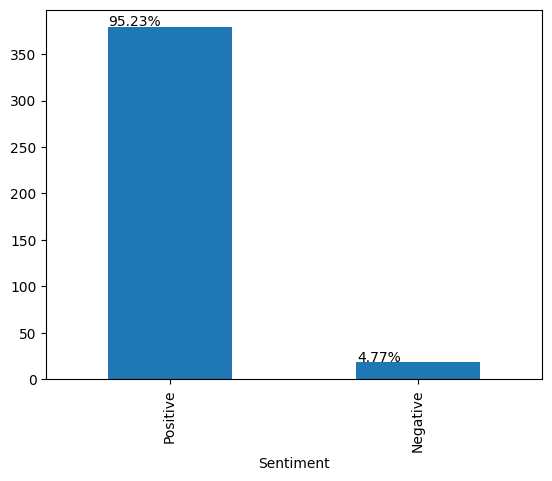

In [ ]:
s = pd.value_counts(df['Sentiment'])
ax = s.plot.bar()
n = len(df.index)
print (n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height()/n*100, 2))+'%', (p.get_x()*1.005, p.get_height()*1.005))

In [ ]:
!pip install wordcloud

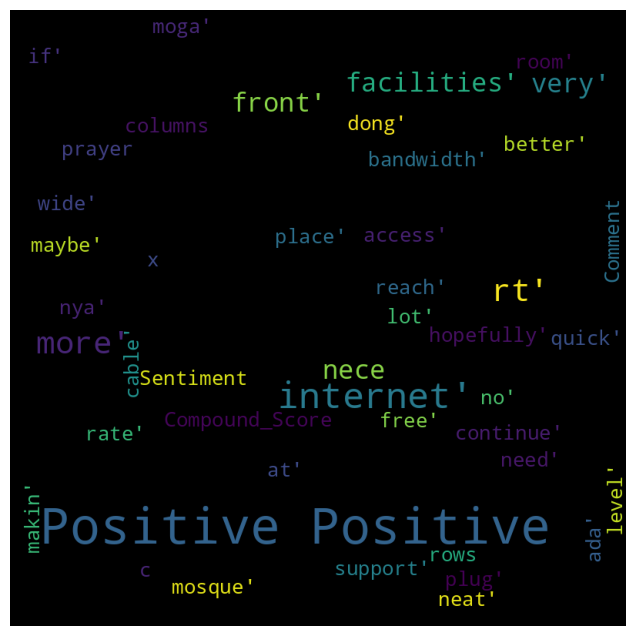

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, background_color ='black', max_words = 1000, min_font_size = 20).generate(str(df))

#plot the word cloud
fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(all_words):
    wordcloud = WordCloud(width = 800, height = 500,
                          random_state=21, max_font_size =100,
                          relative_scaling = 0.5, # Fixed typo here
                           colormap='viridis').generate(all_words) # generate wordcloud from text

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear") # Display the generated image
    plt.axis("off")
    plt.show()

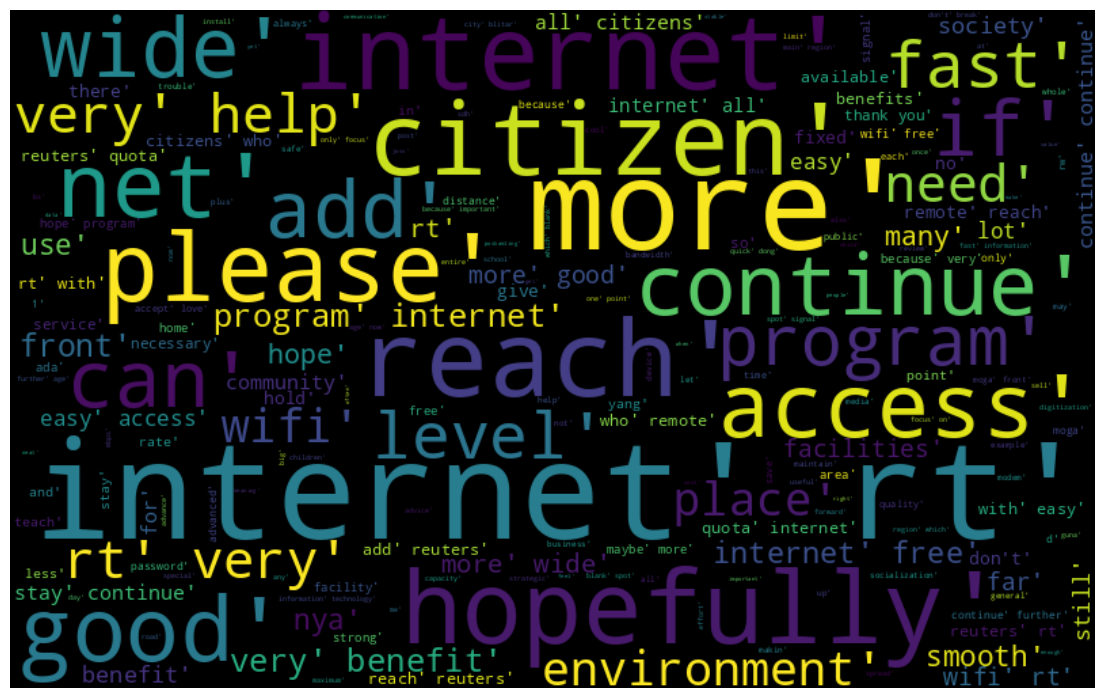

In [ ]:
all_words = ' '.join([text for text in df['Comment'][df.Sentiment == 'Positive']])
generate_wordcloud(all_words)

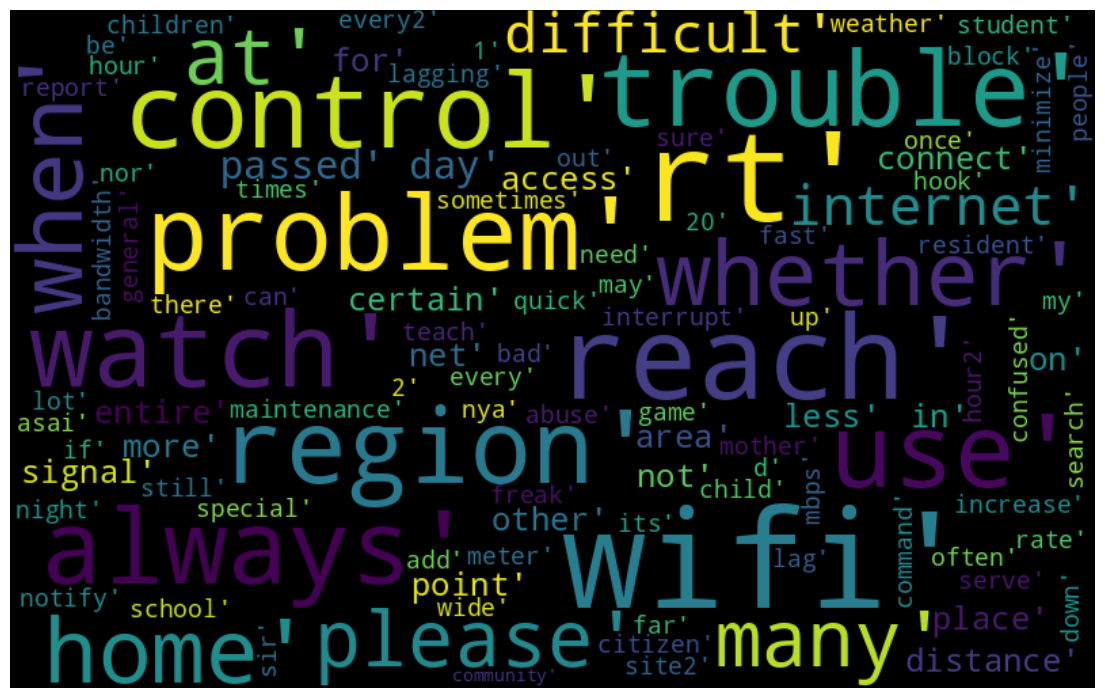

In [ ]:
all_words = ' '.join([text for text in df['Comment'][df.Sentiment == 'Negative']])
generate_wordcloud(all_words)

In [ ]:
!pip install VaderSentiment

In [ ]:
import pandas as pd
def load_data():
  data = pd.read_csv('hasil_saran.csv')
  return data

In [ ]:
df = load_data()
df.head()

,Comment,Compound_Score,Sentiment
0,"['more', 'quick', 'dong']",0.0000,Positive
1,"['moga', 'front', 'continue', 'level', 'makin'...",0.5574,Positive
2,"['bandwidth', 'rate', 'no', 'lot', 'access', '...",0.0000,Positive
3,"['plug', 'cable', 'maybe', 'more', 'neat']",0.5095,Positive
4,"['if', 'place', 'at', 'mosque', 'prayer room',...",0.0000,Positive


In [ ]:
label = []
for index, row in df.iterrows():
  if row['Sentiment'] == 'Positive':
    label.append(1)
  else:
    label.append(0)

df['label'] = label
df = df.drop(columns=['Compound_Score', 'Sentiment'])
df.head(10)


,Comment,label
0,"['more', 'quick', 'dong']",1
1,"['moga', 'front', 'continue', 'level', 'makin'...",1
2,"['bandwidth', 'rate', 'no', 'lot', 'access', '...",1
3,"['plug', 'cable', 'maybe', 'more', 'neat']",1
4,"['if', 'place', 'at', 'mosque', 'prayer room',...",1
5,"['hopefully', 'internet', 'rt', 'stay', 'conti...",1
6,"['hope', 'program', 'internet', 'rt', 'ttp', '...",1
7,"['there', 'internet', 'level', 'right', 'd', '...",1
8,"['because', 'important', 'access', 'internet',...",1
9,"['any', 'internet', 'please', 'add']",1


##SVM

In [ ]:
df['label'].value_counts()

label
1    379
0     19
Name: count, dtype: int64

In [ ]:
s_1 = df[df['label'] == 0].sample(200, replace=True)
s_2 = df[df['label'] == 1].sample(200, replace=True)
df = pd.concat([s_1, s_2])

print(df.shape)
print(df['label'].value_counts(normalize=True))

(400, 2)
label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Comment'], df['label'],
                                                    test_size=0.2, stratify=df['label'], random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(320, 362)
(80, 362)


In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear')

In [ ]:
#prediksi pada dataset
clf.fit(x_train, y_train)
predict = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.97      0.99        40

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

